In [1]:
Explanation Video Link :- https://drive.google.com/file/d/1hRoruG3y3UmqiYv7ieUPkvkAKTHPyzDs/view?usp=sharing

SyntaxError: invalid decimal literal (1627426790.py, line 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Customer_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data Cleaning and prepares the data for modeling

In [4]:
#here i found the missing values and print if they exixt
def missing_values(df):
    missing = df.isnull().sum()
    return missing[missing > 0]

print("Missing Values:")
print(missing_values(df))

Missing Values:
TotalCharges    11
dtype: int64


In [5]:
#only TotalCharges has missing value so i filled it with median value
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [6]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


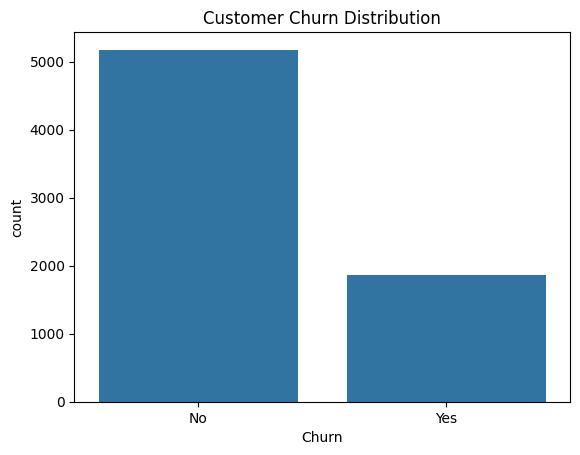

In [7]:
#here i  Visualize the distribution of churn using count plot
sns.countplot(x='Churn', data=df)
plt.title('Customer Churn Distribution')
plt.show()

In [8]:
label_enc = LabelEncoder()
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod', 'Churn']:
    df[col] = label_enc.fit_transform(df[col])

In [9]:
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

Now I am going to create a model

In [10]:
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [12]:
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

here I am going to evaluate the model performance using appropriate metrics

In [13]:
y_pred = model.predict(X_test)


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7856
Precision: 0.6239
Recall: 0.4848
F1 Score: 0.5456


Here I am going to test model for new data

In [68]:
# here I Defined a new customer data
new_data = pd.DataFrame({
    'customerID': ['12345', '67890', '54321'],  
    'gender': ['Female', 'Male', 'Female'],
    'SeniorCitizen': [0, 1, 0],
    'Partner': ['Yes', 'No', 'Yes'],
    'Dependents': ['No', 'No', 'Yes'],
    'tenure': [5, 40, 10],
    'PhoneService': ['Yes', 'No', 'Yes'],
    'MultipleLines': ['No', 'No', 'Yes'],
    'InternetService': ['Fiber optic', 'DSL', 'Fiber optic'],
    'OnlineSecurity': ['No', 'Yes', 'No'],
    'OnlineBackup': ['No', 'Yes', 'Yes'],
    'DeviceProtection': ['Yes', 'No', 'No'],
    'TechSupport': ['No', 'Yes', 'No'],
    'StreamingTV': ['Yes', 'No', 'Yes'],
    'StreamingMovies': ['Yes', 'No', 'No'],
    'Contract': ['Month-to-month', 'Two year', 'One year'],
    'PaperlessBilling': ['Yes', 'No', 'Yes'],
    'PaymentMethod': ['Electronic check', 'Mailed check', 'Electronic check'],
    'MonthlyCharges': [70.35, 56.95, 45.50],
    'TotalCharges': [351.75, 2150.65, 455.00]
})

In [69]:
new_data_processed = new_data.drop(columns=['customerID'])

In [70]:
encoders = {}

for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']:
    le = LabelEncoder()
    new_data_processed[col] = le.fit_transform(new_data_processed[col]) 

In [71]:
new_data_processed[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(new_data_processed[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [72]:
for col in encoders.keys():
    new_data_processed[col] = encoders[col].transform(new_data_processed[col])

In [73]:
predictions = model.predict(new_data_processed)
new_data['Churn_Predicted'] = predictions
print(new_data[['customerID', 'Churn_Predicted']])

  customerID  Churn_Predicted
0      12345                1
1      67890                0
2      54321                0
